In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import torch
import matplotlib.pyplot as plt

from src.models.baseline import get_model
from src.explainability.activation_maximization import (
    ActivationMaximization,
    visualize_activation_maximization,
    plot_optimization_curves
)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print(f"Project root: {project_root}")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

# Install scipy if needed
try:
    import scipy
except ImportError:
    print("Scipy not found. Install manually via 'pip install scipy'")


Project root: /home/javier/final_project_xai
Device: cuda


### Load both models

In [2]:
checkpoint_dir = project_root / 'models' / 'checkpoints'

print("Loading BASELINE model...")
baseline_model = get_model(num_classes=2, pretrained=True, device=device)
baseline_checkpoint = torch.load(checkpoint_dir / 'baseline_best.pth', weights_only=False)
baseline_model.load_state_dict(baseline_checkpoint['model_state_dict'])
baseline_model.eval()
print(f"Loaded baseline model")

Loading BASELINE model...
BaselineModel created:
   Architecture: ResNet18
   Pretrained: True
   Output classes: 2
   Dropout: 0.3
   Trainable parameters: 11,177,538
   Total parameters: 11,177,538
Loaded baseline model


In [3]:
print("\nLoading SHORTCUT model...")
shortcut_model = get_model(num_classes=2, pretrained=False, device=device)
shortcut_checkpoint = torch.load(checkpoint_dir / 'shortcut_best.pth', weights_only=False)
shortcut_model.load_state_dict(shortcut_checkpoint['model_state_dict'])
shortcut_model.eval()
print(f"Loaded shortcut model")


Loading SHORTCUT model...
BaselineModel created:
   Architecture: ResNet18
   Pretrained: False
   Output classes: 2
   Dropout: 0.3
   Trainable parameters: 11,177,538
   Total parameters: 11,177,538
Loaded shortcut model


### Generate prototypes for BASELINE Model - NORMAL class


BASELINE MODEL: NORMAL CLASS PROTOTYPES

Sample 1/4

Generating image for class 0...
   Iteration 100/500: Score = 5.684
   Iteration 200/500: Score = 10.454
   Iteration 300/500: Score = 14.747
   Iteration 400/500: Score = 13.255
   Iteration 500/500: Score = 17.859
Final score: 17.859

Sample 2/4

Generating image for class 0...
   Iteration 100/500: Score = 10.406
   Iteration 200/500: Score = 10.185
   Iteration 300/500: Score = 18.413
   Iteration 400/500: Score = 13.440
   Iteration 500/500: Score = 15.061
Final score: 15.061

Sample 3/4

Generating image for class 0...
   Iteration 100/500: Score = 11.368
   Iteration 200/500: Score = 14.831
   Iteration 300/500: Score = 17.438
   Iteration 400/500: Score = 16.549
   Iteration 500/500: Score = 16.760
Final score: 16.760

Sample 4/4

Generating image for class 0...
   Iteration 100/500: Score = 9.724
   Iteration 200/500: Score = 12.090
   Iteration 300/500: Score = 12.784
   Iteration 400/500: Score = 13.261
   Iteration 500/5

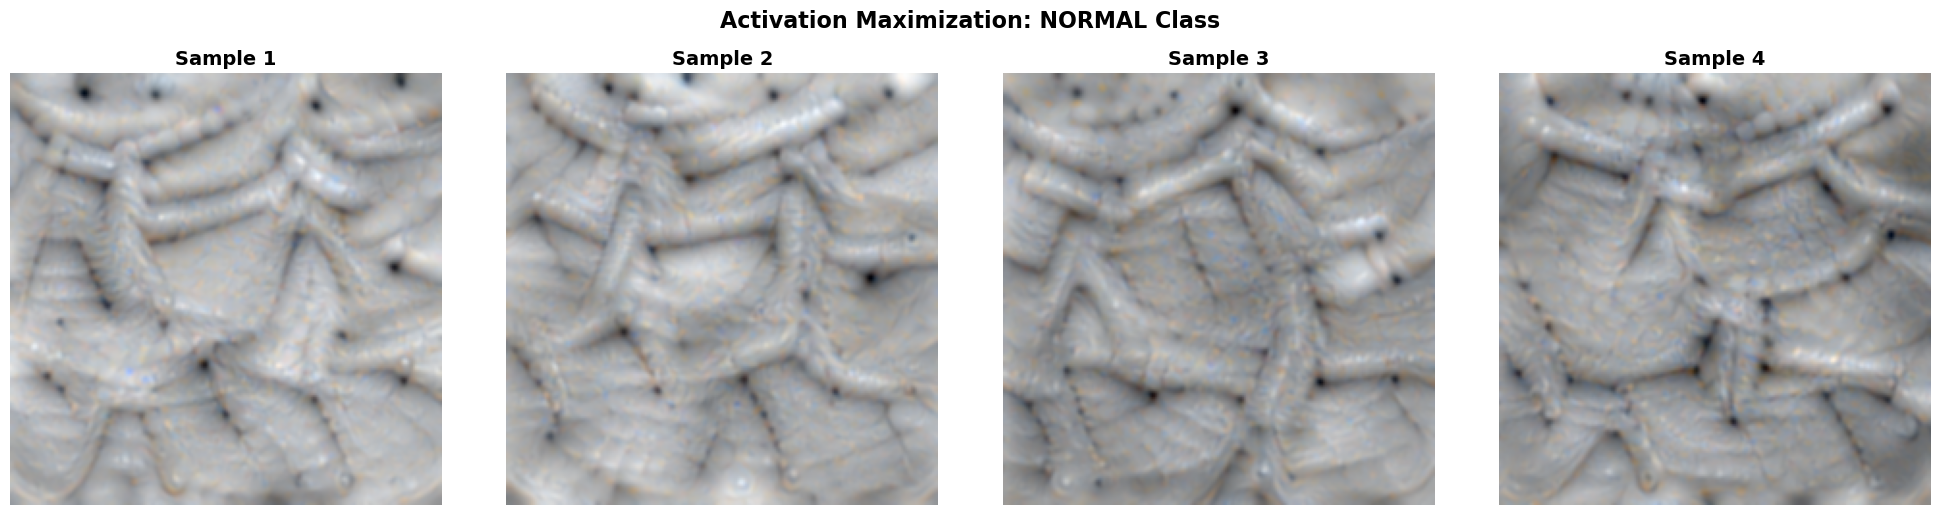

Saved: /home/javier/final_project_xai/reports/figures/15_am_baseline_normal_curves.png


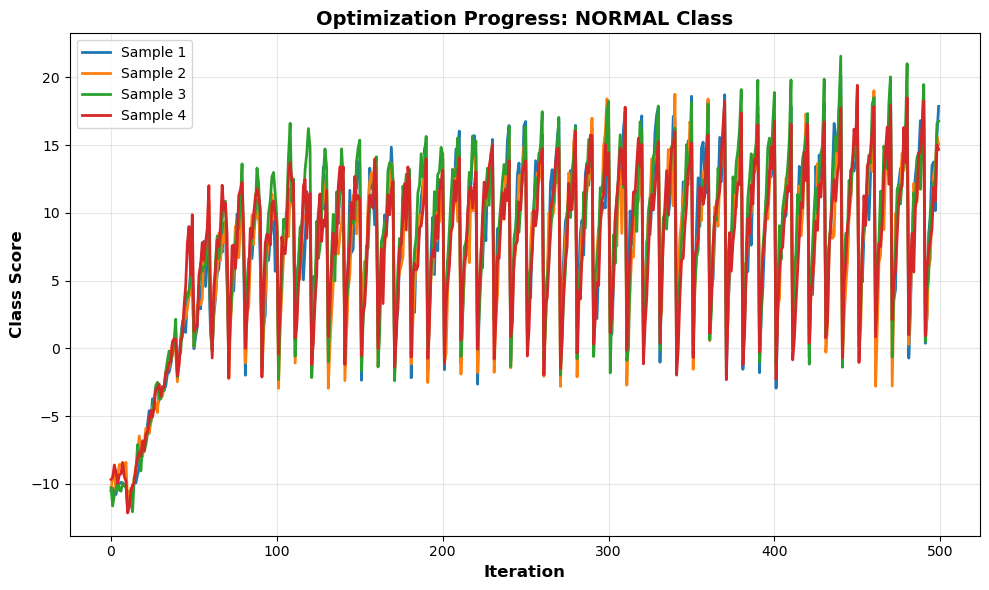

In [4]:
print("\n" + "="*70)
print("BASELINE MODEL: NORMAL CLASS PROTOTYPES")
print("="*70)

class_names = ['NORMAL', 'PNEUMONIA']

am_baseline = ActivationMaximization(baseline_model, device=device)

baseline_normal_images, baseline_normal_scores = am_baseline.generate_multiple(
    target_class=0,  # NORMAL
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

# Visualize
visualize_activation_maximization(
    baseline_normal_images,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '15_am_baseline_normal.png'
)

# Plot optimization curves
plot_optimization_curves(
    baseline_normal_scores,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '15_am_baseline_normal_curves.png'
)

### Generate prototypes for BASELINE model - PNEUMONIA class


BASELINE MODEL: PNEUMONIA CLASS PROTOTYPES

Sample 1/4

Generating image for class 1...
   Iteration 100/500: Score = 29.854
   Iteration 200/500: Score = 39.323
   Iteration 300/500: Score = 42.579
   Iteration 400/500: Score = 39.912
   Iteration 500/500: Score = 44.654
Final score: 44.654

Sample 2/4

Generating image for class 1...
   Iteration 100/500: Score = 37.780
   Iteration 200/500: Score = 38.470
   Iteration 300/500: Score = 47.237
   Iteration 400/500: Score = 39.979
   Iteration 500/500: Score = 36.935
Final score: 36.935

Sample 3/4

Generating image for class 1...
   Iteration 100/500: Score = 38.247
   Iteration 200/500: Score = 39.749
   Iteration 300/500: Score = 43.711
   Iteration 400/500: Score = 43.217
   Iteration 500/500: Score = 42.911
Final score: 42.911

Sample 4/4

Generating image for class 1...
   Iteration 100/500: Score = 33.671
   Iteration 200/500: Score = 37.211
   Iteration 300/500: Score = 37.566
   Iteration 400/500: Score = 38.507
   Iteration 

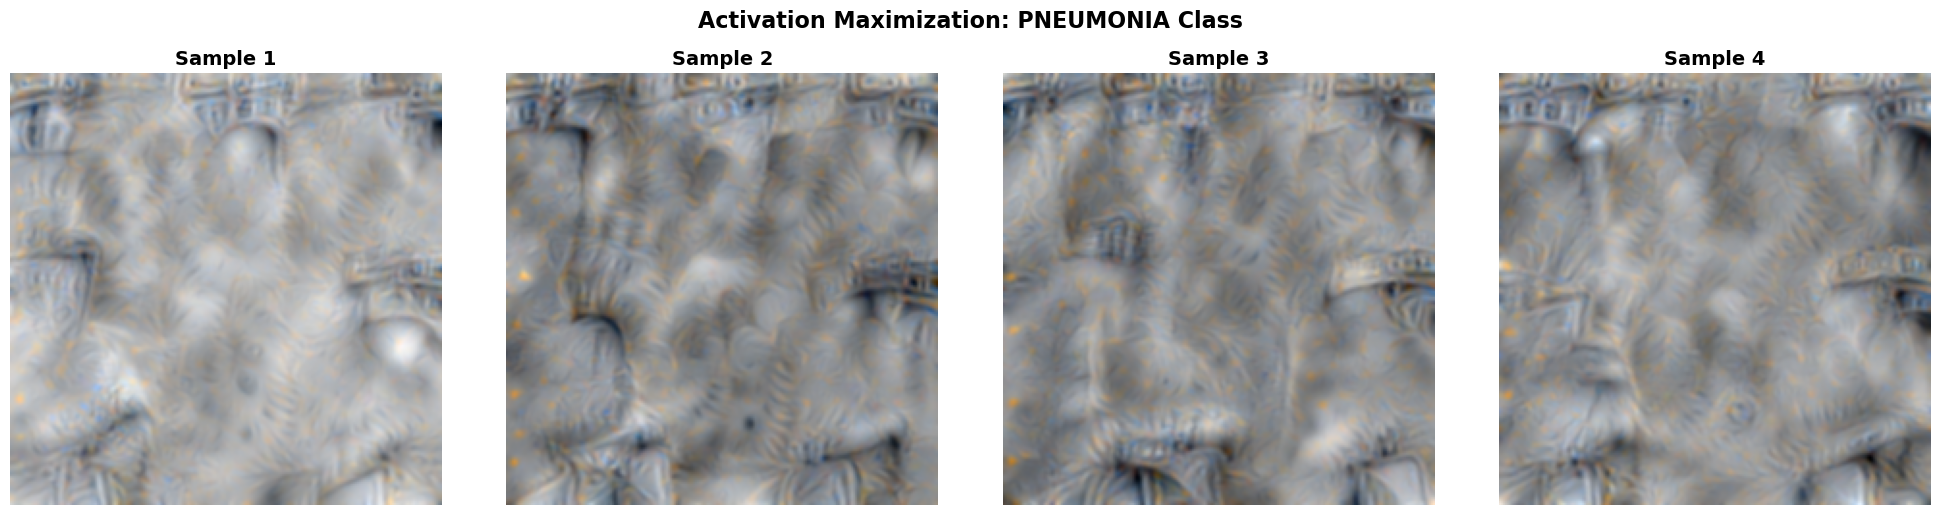

Saved: /home/javier/final_project_xai/reports/figures/16_am_baseline_pneumonia_curves.png


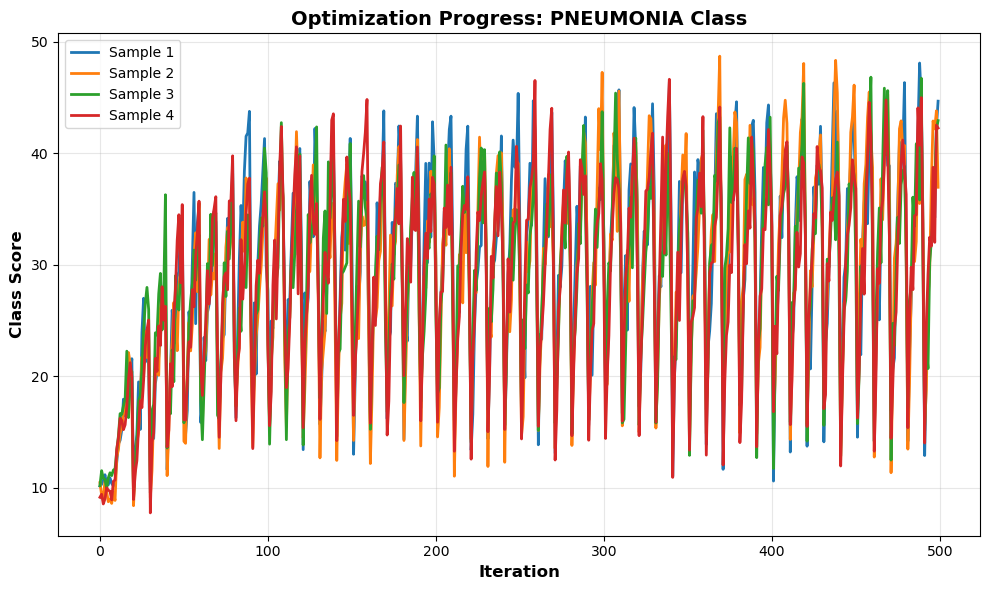

In [5]:
print("\n" + "="*70)
print("BASELINE MODEL: PNEUMONIA CLASS PROTOTYPES")
print("="*70)

baseline_pneumonia_images, baseline_pneumonia_scores = am_baseline.generate_multiple(
    target_class=1,  # PNEUMONIA
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

visualize_activation_maximization(
    baseline_pneumonia_images,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '16_am_baseline_pneumonia.png'
)

plot_optimization_curves(
    baseline_pneumonia_scores,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '16_am_baseline_pneumonia_curves.png'
)

### Generate prototypes for SHORTCUT Model - NORMAL class


SHORTCUT MODEL: NORMAL CLASS PROTOTYPES

Sample 1/4

Generating image for class 0...
   Iteration 100/500: Score = 2.532
   Iteration 200/500: Score = 2.538
   Iteration 300/500: Score = 2.547
   Iteration 400/500: Score = 2.538
   Iteration 500/500: Score = 2.540
Final score: 2.540

Sample 2/4

Generating image for class 0...
   Iteration 100/500: Score = 2.580
   Iteration 200/500: Score = 2.541
   Iteration 300/500: Score = 2.554
   Iteration 400/500: Score = 2.552
   Iteration 500/500: Score = 2.543
Final score: 2.543

Sample 3/4

Generating image for class 0...
   Iteration 100/500: Score = 2.579
   Iteration 200/500: Score = 2.556
   Iteration 300/500: Score = 2.554
   Iteration 400/500: Score = 2.556
   Iteration 500/500: Score = 2.558
Final score: 2.558

Sample 4/4

Generating image for class 0...
   Iteration 100/500: Score = 2.559
   Iteration 200/500: Score = 2.537
   Iteration 300/500: Score = 2.547
   Iteration 400/500: Score = 2.540
   Iteration 500/500: Score = 2.547
Fi

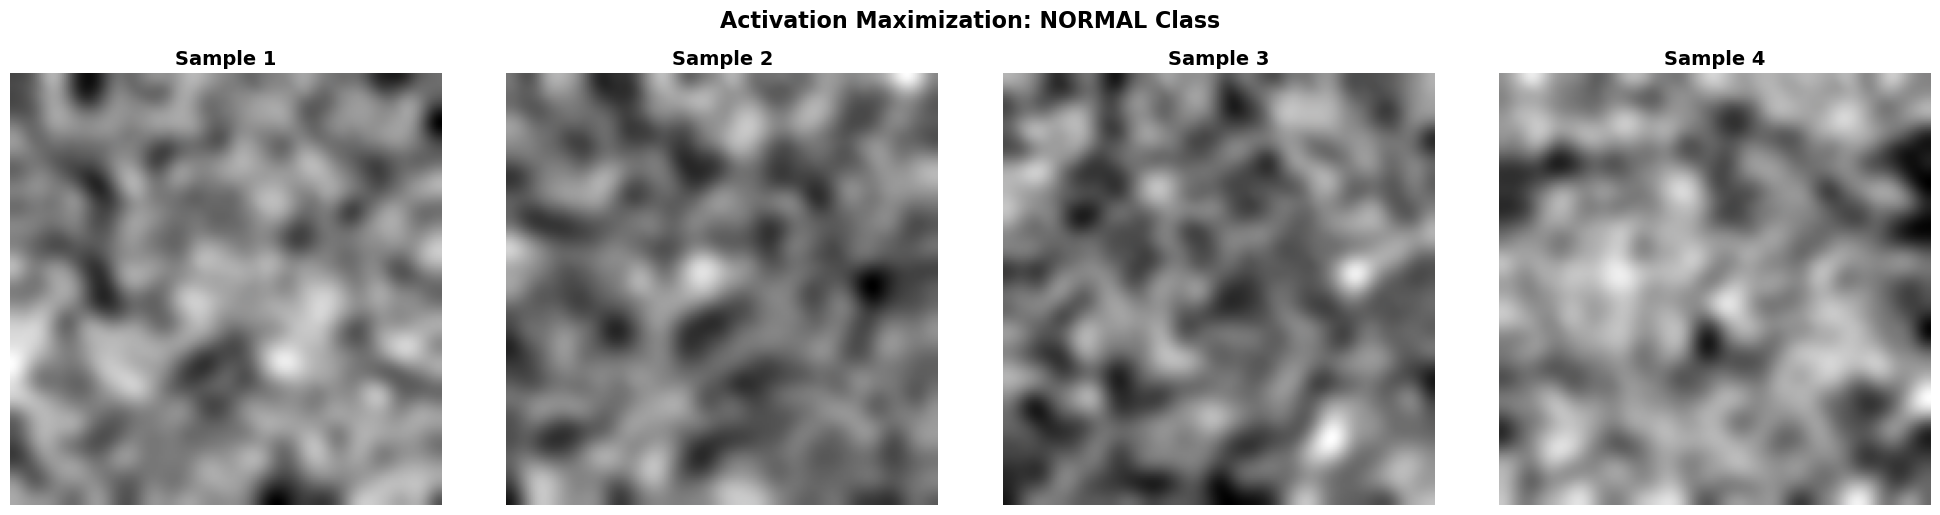

Saved: /home/javier/final_project_xai/reports/figures/17_am_shortcut_normal_curves.png


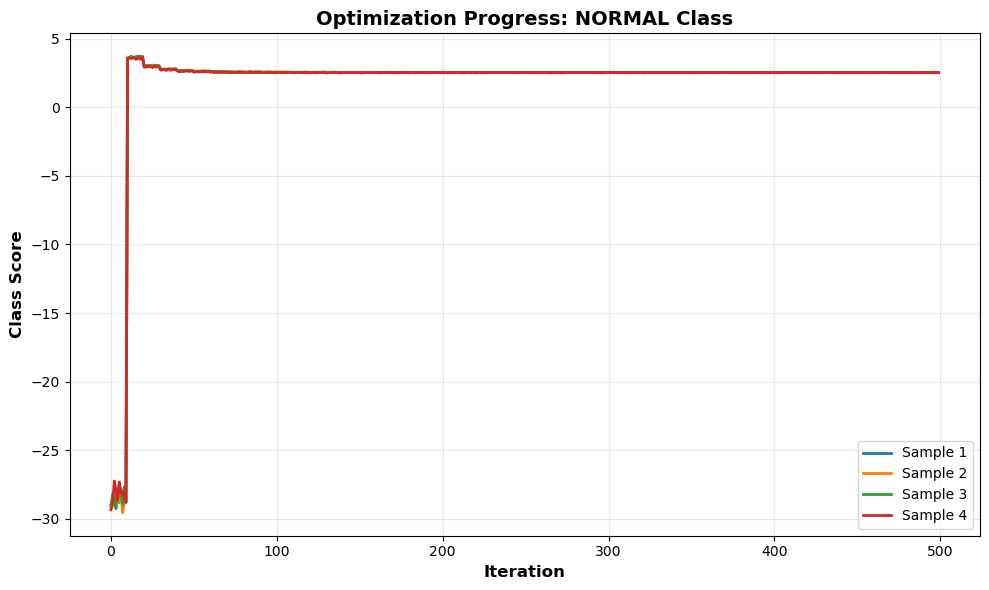

In [6]:
print("\n" + "="*70)
print("SHORTCUT MODEL: NORMAL CLASS PROTOTYPES")
print("="*70)

am_shortcut = ActivationMaximization(shortcut_model, device=device)

shortcut_normal_images, shortcut_normal_scores = am_shortcut.generate_multiple(
    target_class=0,  # NORMAL
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

visualize_activation_maximization(
    shortcut_normal_images,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '17_am_shortcut_normal.png'
)

plot_optimization_curves(
    shortcut_normal_scores,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '17_am_shortcut_normal_curves.png'
)

### Generate prototypes for SHORTCUT Model - PNEUMONIA class


SHORTCUT MODEL: PNEUMONIA CLASS PROTOTYPES

Sample 1/4

Generating image for class 1...
   Iteration 100/500: Score = -2.644
   Iteration 200/500: Score = -2.646
   Iteration 300/500: Score = -2.637
   Iteration 400/500: Score = -2.636
   Iteration 500/500: Score = -2.633
Final score: -2.633

Sample 2/4

Generating image for class 1...
   Iteration 100/500: Score = -2.690
   Iteration 200/500: Score = -2.662
   Iteration 300/500: Score = -2.653
   Iteration 400/500: Score = -2.640
   Iteration 500/500: Score = -2.645
Final score: -2.645

Sample 3/4

Generating image for class 1...
   Iteration 100/500: Score = -2.658
   Iteration 200/500: Score = -2.656
   Iteration 300/500: Score = -2.646
   Iteration 400/500: Score = -2.643
   Iteration 500/500: Score = -2.642
Final score: -2.642

Sample 4/4

Generating image for class 1...
   Iteration 100/500: Score = -2.690
   Iteration 200/500: Score = -2.655
   Iteration 300/500: Score = -2.655
   Iteration 400/500: Score = -2.648
   Iteration 

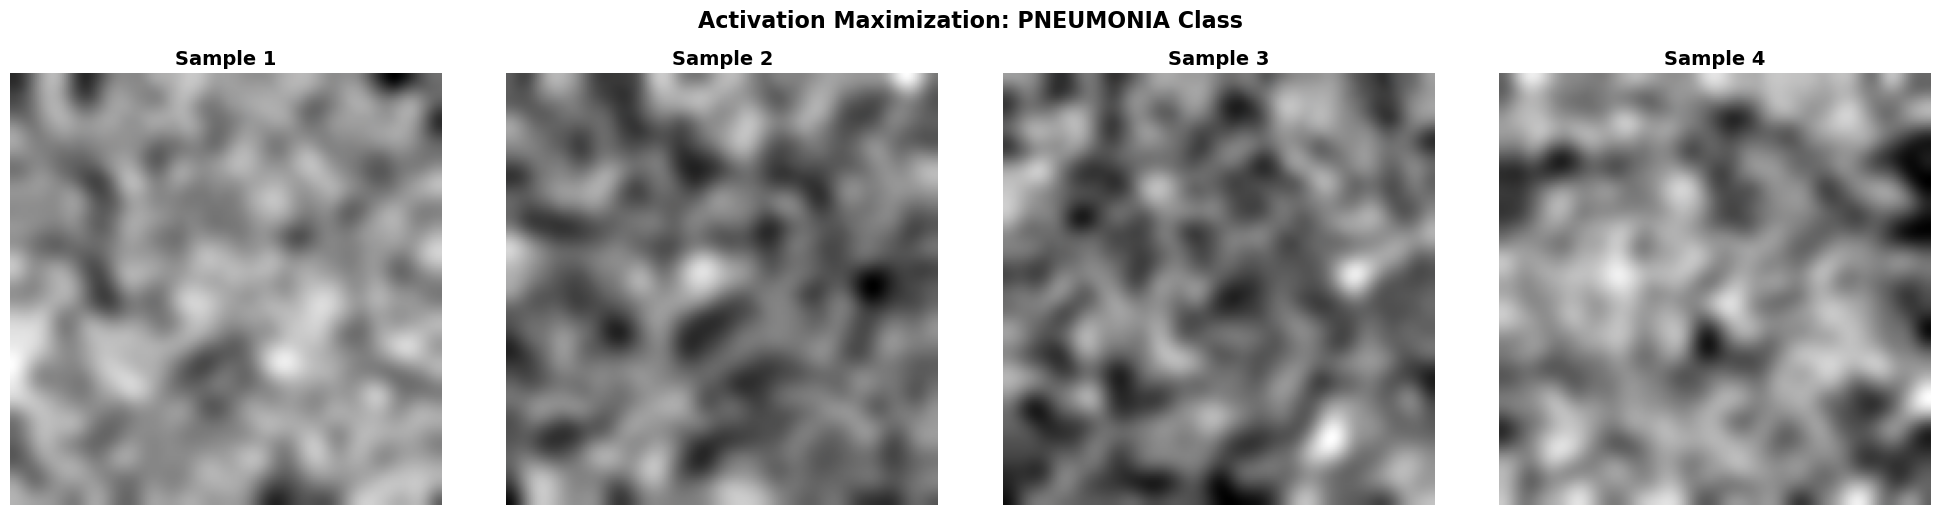

Saved: /home/javier/final_project_xai/reports/figures/18_am_shortcut_pneumonia_curves.png


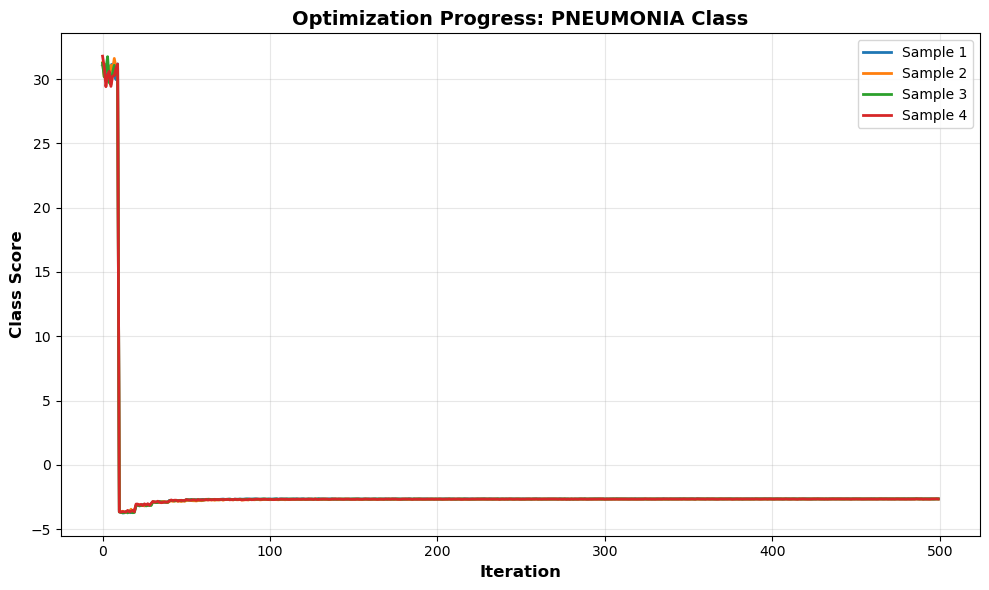

In [7]:
print("\n" + "="*70)
print("SHORTCUT MODEL: PNEUMONIA CLASS PROTOTYPES")
print("="*70)

am_shortcut = ActivationMaximization(shortcut_model, device=device)

shortcut_pneumonia_images, shortcut_pneumonia_scores = am_shortcut.generate_multiple(
    target_class=1,  # PNEUMONIA
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

visualize_activation_maximization(
    shortcut_pneumonia_images,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '18_am_shortcut_pneumonia.png'
)

plot_optimization_curves(
    shortcut_pneumonia_scores,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '18_am_shortcut_pneumonia_curves.png'
)


COMPARISON: BASELINE VS SHORTCUT (PNEUMONIA)
Saved: /home/javier/final_project_xai/reports/figures/19_am_comparison_baseline_vs_shortcut.png


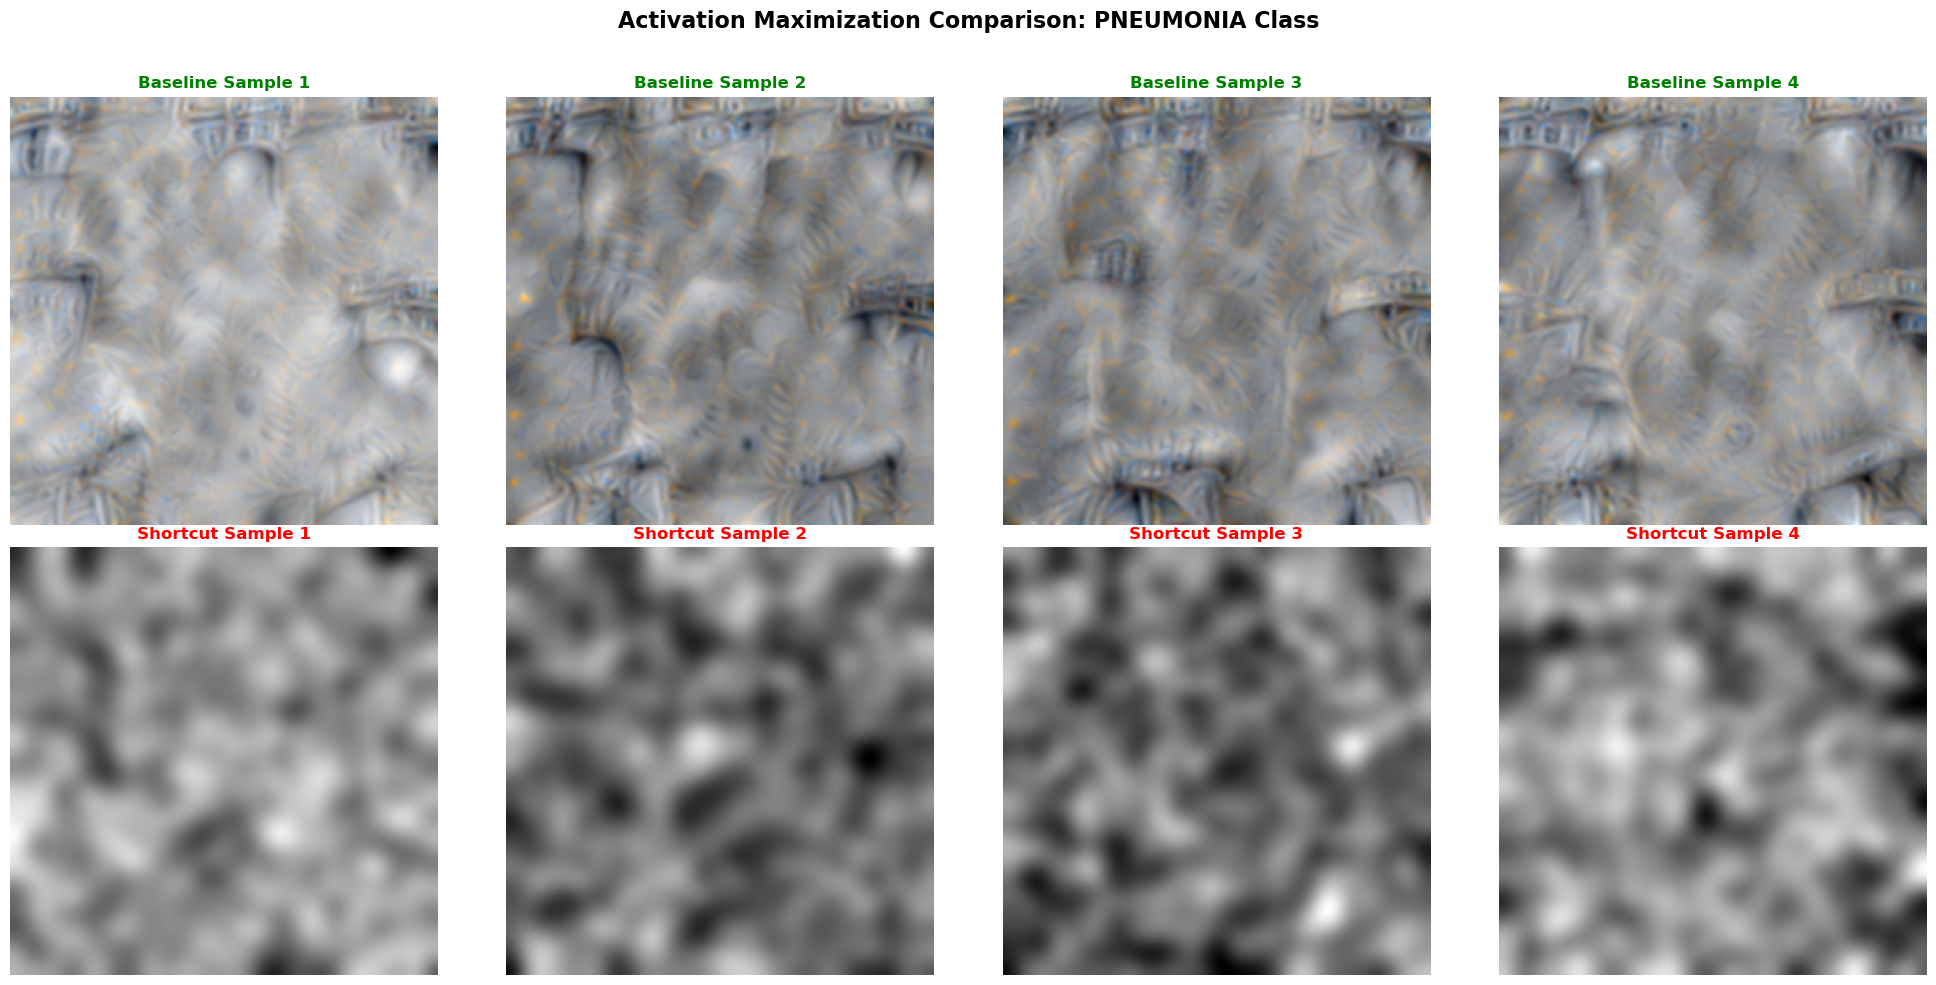

In [8]:
print("\n" + "="*70)
print("COMPARISON: BASELINE VS SHORTCUT (PNEUMONIA)")
print("="*70)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Row 1: Baseline
for i in range(4):
    from src.explainability.activation_maximization import denormalize_for_visualization
    img_vis = denormalize_for_visualization(baseline_pneumonia_images[i])
    axes[0, i].imshow(img_vis)
    axes[0, i].set_title(f'Baseline Sample {i+1}', fontsize=12, fontweight='bold', color='green')
    axes[0, i].axis('off')

# Row 2: Shortcut
for i in range(4):
    img_vis = denormalize_for_visualization(shortcut_pneumonia_images[i])
    axes[1, i].imshow(img_vis)
    axes[1, i].set_title(f'Shortcut Sample {i+1}', fontsize=12, fontweight='bold', color='red')
    axes[1, i].axis('off')

plt.suptitle(
    'Activation Maximization Comparison: PNEUMONIA Class',
    fontsize=16,
    fontweight='bold',
    y=0.98
)
plt.tight_layout(rect=[0, 0, 1, 0.96])

save_path = project_root / 'reports' / 'figures' / '19_am_comparison_baseline_vs_shortcut.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

De estos resultados, podemos obtener varias conclusiones interesantes:
- Los prototipos generados para el modelo BASELINE (para ambas clases) parecen más detallados y complejos, con la clase PNEUMONIA mostrando de bajo nivel y texturas que podrían estar asociadas con la enfermedad. Las de la clase NORMAL recuerdan a patrones parecidos a costillas.
- En contraste, los prototipos del modelo SHORTCUT son más simples y menos detallados, pareciendo más bien ruido blanco. Esto sugiere que el modelo SHORTCUT no ha aprendido características significativas de las imágenes, sino que se basa en atajos o artefactos presentes en los datos de entrenamiento.
- El score óptimo obtenido por el algoritmo para el modelo _shortcut_ y la clase PNEUMONIA es negativo, lo que indica que el algoritmo no es capaz de generar, bajo sus restricciones, una imagen que el modelo clasifique como PNEUMONIA con alta confianza. Si bien hacemos mayor hincapié en esto en el informe final, este resultado sugiere que ciertas penalizaciones (regularización L2, desenfoque periódico, etc.) podrían estar limitando la capacidad del algoritmo para encontrar prototipos con la presencia del atajo aprendido por el modelo SHORTCUT.